> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

The dataset comes from Udacity Data Analyst Nano Degree, originally from the kaggle. This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. It contains 10866 rows and 21 columns.

We interest to learn more about

Which genres are most popular from year to year?
What kinds of properties are associated with movies that have high revenues?
What are the top 10 most profitable movies?
Which director produce most movies?

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the `Project Details` page of `Investigate a Dataset` lesson for this course. List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 

> The dataset comes from Udacity Data Analyst Nano Degree, originally from the kaggle. This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. It contains 10866 rows and 21 columns.



### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

*We are going to investigate:*

    Question 1: What was the most produced movie genre each year?
    
    Question 2: What is the most highly rated movie genre in each year?
    
    Question 3: Which director produced the most movies?

    Question 4: What factors influence high movie revenues?


> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

In [53]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# While optional for current notebooks, if you are having trouble with visualizations,
#   remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations initially. This does not have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, trim the excess and organize your steps so that you have a flowing, cohesive report.

In [54]:
# Load your data and print out a few lines. What is the size of your dataframe? 
#   Perform operations to inspect data types and look for instances of missing
#   or possibly errant data. There are at least 4 - 6 methods you can call on your
#   dataframe to obtain this information.

df = pd.read_csv('tmdb-movies.csv')
df.head(10)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

    determining the shape of our data frame 


In [55]:
num_rows, num_cols = df.shape
print("Size of the DataFrame:")
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Size of the DataFrame:
Number of rows: 10866
Number of columns: 21


    creating a new column to calculate net profit for each movie 

In [56]:
#create new column to calculate net profit for each movie 
df['net_profit'] = df['revenue'] - df['budget']

# Obtaining information about our data frame 


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Check for and drop any duplicated rows.

In [58]:
df.duplicated().sum()

1

In [59]:
df.drop_duplicates(inplace = True)

    Obtaining general info about each line of our data frame 

In [60]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,net_profit
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07,2.520261e+07
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08,9.659103e+07
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,-4.139124e+08
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07,9.092453e+06
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,2.544506e+09


In [61]:
# checking for missing values 
print(df.isna().sum())

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
net_profit                 0
dtype: int64


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10865 entries, 0 to 10865
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10855 non-null  object 
 2   popularity            10865 non-null  float64
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   cast                  10789 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10821 non-null  object 
 9   tagline               8041 non-null   object 
 10  keywords              9372 non-null   object 
 11  overview              10861 non-null  object 
 12  runtime               10865 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9835 non-null   object 
 15  release_date          10

Using histograms to help anamyse data 

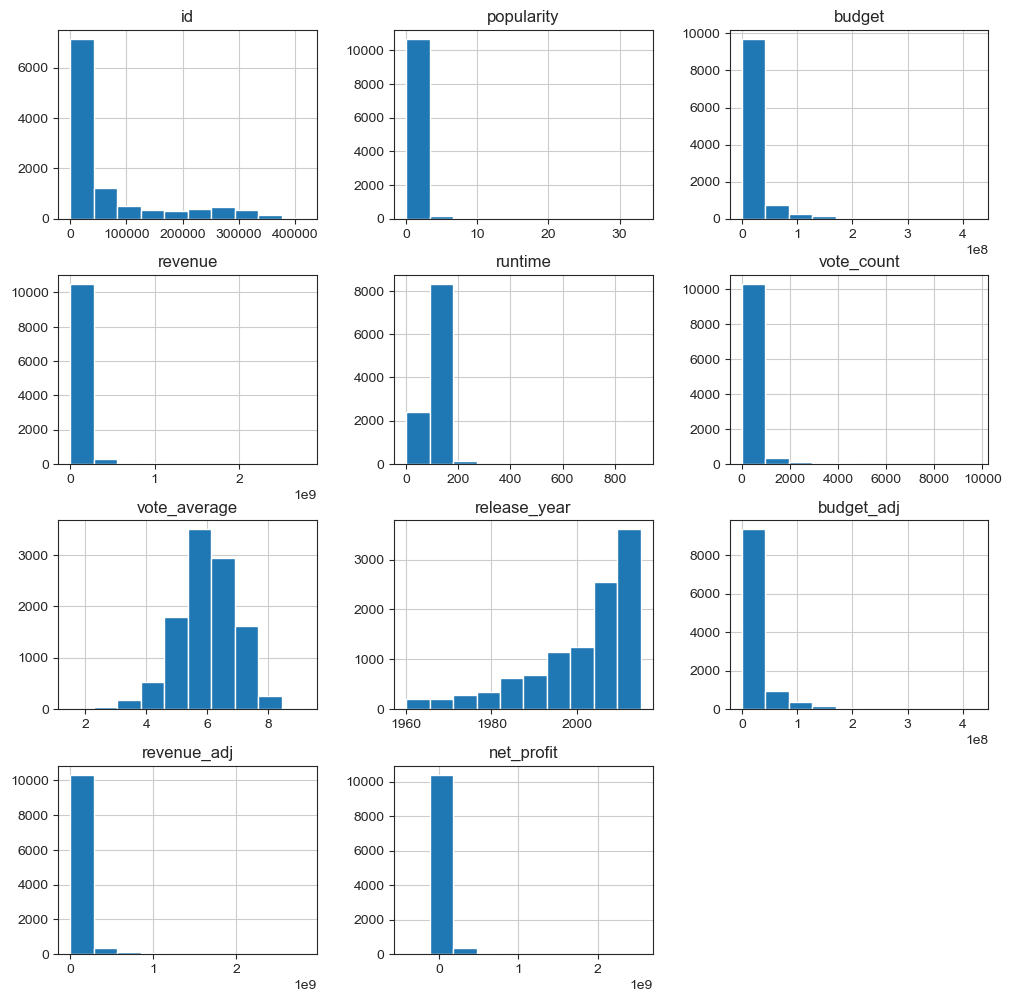

In [63]:
df.hist(figsize = (12, 12));



### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [64]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. Remember to utilize the visualizations that the pandas library already has available.



> **Tip**: Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (What is the most highly rated movie genre in each year?)

In [65]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


     From our data wrangling, we see that 23 rows in our data set do not have genres. This means we will make a new data frame called df and remove these rows from it 

     From our data frame, we observe that the genres columns have more than one genre, so we need to consider all the genres to find out the most popular genres.


In [66]:
# make a copy of our dataframe 
df1 = df.copy()

# remove rows that do not have values for genres 
df1.dropna(axis = 0, inplace = True, subset = ['genres'])

# split the genres string
df1.genres = df1.genres.str.split('|')

# split genres to allow for multiple rows to be in the document 
df1 = df1.explode('genres')
df1

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,net_profit
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,94,Mystery,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00,0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,94,Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00,0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,80,Action,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00,0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,80,Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00,0


### Spliting values in the genre columns

In [67]:
# create a dictionary with unique genres 
total_genre_list = pd.unique(df1['genres'])
print(total_genre_list)

['Action' 'Adventure' 'Science Fiction' 'Thriller' 'Fantasy' 'Crime'
 'Western' 'Drama' 'Family' 'Animation' 'Comedy' 'Mystery' 'Romance' 'War'
 'History' 'Music' 'Horror' 'Documentary' 'TV Movie' 'Foreign']


In [68]:
#stores our final list of movies and counts 
movie_count_list = []

#loop through list of unique genre 
for unique_genre in total_genre_list:
    
    # create a list to store ids where the unique genre matches the specific list
    genre_list = []
    
    # loop through each row in our dataframe
    for index, row in df1.iterrows():
        id = row['id'];
        row_genre = row['genres']
        
        #check if the genre in the row matches that of each genre and adds it to the genre_list
        if row_genre == unique_genre:
            genre_list.append(id)
            
    movie_count_list.append([unique_genre, len(genre_list)])

movie_count_list


[['Action', 2384],
 ['Adventure', 1471],
 ['Science Fiction', 1229],
 ['Thriller', 2907],
 ['Fantasy', 916],
 ['Crime', 1354],
 ['Western', 165],
 ['Drama', 4760],
 ['Family', 1231],
 ['Animation', 699],
 ['Comedy', 3793],
 ['Mystery', 810],
 ['Romance', 1712],
 ['War', 270],
 ['History', 334],
 ['Music', 408],
 ['Horror', 1637],
 ['Documentary', 520],
 ['TV Movie', 167],
 ['Foreign', 188]]

In [69]:
#alternatively, we can use 
df1['genres'].value_counts()


genres
Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
Name: count, dtype: int64

In [70]:
# Create a DataFrame from movie count list 
movie_df = pd.DataFrame(movie_count_list, columns= ['Genre', 'Count'])

#sort our dataframe to make it easier to read 
movie_df = pd.DataFrame(movie_count_list, columns= ['Genre', 'Count'])
sorted_movie_df = movie_df.sort_values(by='Count')

sorted_movie_df

,Genre,Count
6,Western,165
18,TV Movie,167
19,Foreign,188
13,War,270
14,History,334
15,Music,408
17,Documentary,520
9,Animation,699
11,Mystery,810
4,Fantasy,916


### Graph Plotting 

Text(0, 0.5, 'Genre')

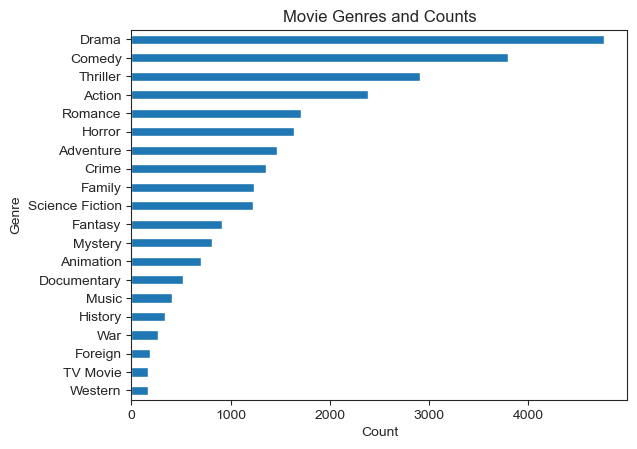

In [71]:
sorted_movie_df.plot(kind='barh', x='Genre', y='Count', legend=False)
# Customize the plot

sns.set_style('ticks') 


plt.title('Movie Genres and Counts')
plt.xlabel('Count')
plt.ylabel('Genre')


    The use of a bar chart allows us to easily distingiush the difference in rating counts per movie genre. 

    Through this, we are able to obser that the most popular and highly rated movie genre produced was drama (with a count of 4760) while the least was Western (with a count of 165).


### Plotting a Pie Chart

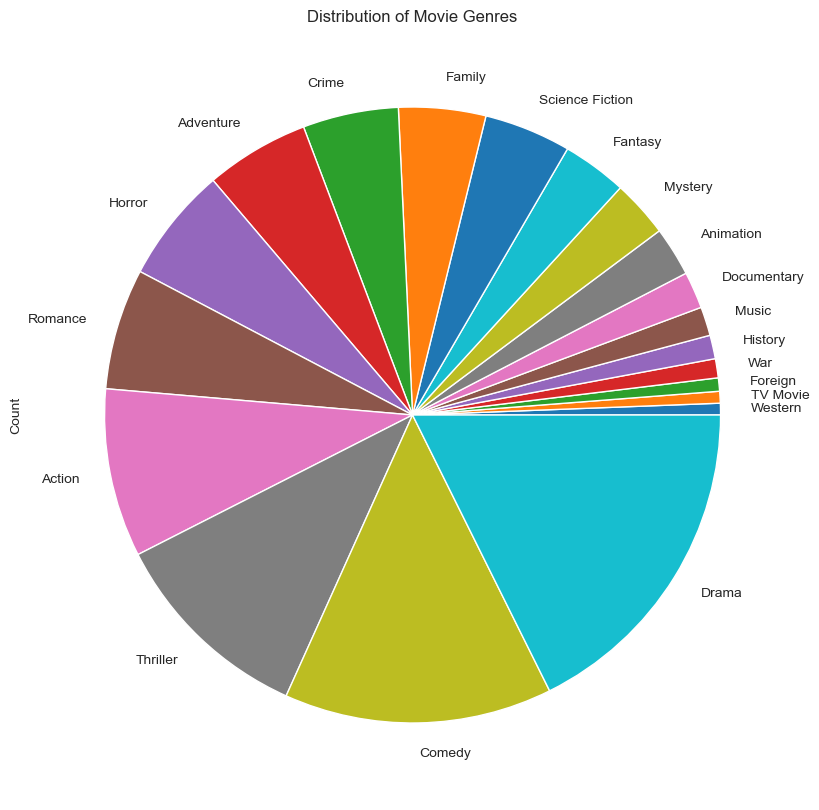

In [72]:
sorted_movie_df.plot.pie(y='Count', labels= sorted_movie_df['Genre'], legend=False, figsize=(10, 10))

sns.set_style('ticks') 

# Customize the plot
plt.title('Distribution of Movie Genres')
plt.show()

    From these charts, it is easy to see which genres have the most movies. From all the years that the data was collected, the most popular movie genres are Drama (17.7%), Comedy (14.1%), and Thriller (10.8%) with Drama being present in approx. 18% of the total data set. 

### Research Question 2  (What is the most highly rated movie genre in each year?)

In [73]:
df1['popularity'].describe()

count    26955.000000
mean         0.706112
std          1.114979
min          0.000065
25%          0.224628
50%          0.411324
75%          0.774737
max         32.985763
Name: popularity, dtype: float64

    From this information, we deducate that movies are popular if the value is higher than the mean. This means when popularity > 1 

In [74]:
# calculation the popularity of each genres for each years
genres_count = df1.groupby(['release_year','genres'], as_index=False)['popularity'].mean()
genres_count

,release_year,genres,popularity
0,1960,Action,0.590724
1,1960,Adventure,0.700981
2,1960,Comedy,0.396000
3,1960,Crime,0.346479
4,1960,Drama,0.566305
...,...,...,...
1044,2015,Science Fiction,2.245603
1045,2015,TV Movie,0.260574
1046,2015,Thriller,1.401877
1047,2015,War,1.284511


In [75]:
# Makes a dataframe with the maximum popularity for each year 
max_popularity = genres_count.groupby('release_year').agg({'popularity':'max'})
max_popularity.head()

,popularity
release_year,
1960,0.811910
1961,2.631987
1962,0.942513
1963,2.180410
1964,0.930959


In [76]:
# Makes a dataframe that merges the genre with max popularity to obain the most popular genre annually.
yearly_popular_genre = genres_count.merge(max_popularity, how='inner', right_on='popularity', left_on='popularity')

yearly_popular_genre.head()

,release_year,genres,popularity
0,1960,Thriller,0.811910
1,1961,Animation,2.631987
2,1962,Adventure,0.942513
3,1963,Animation,2.180410
4,1964,War,0.930959


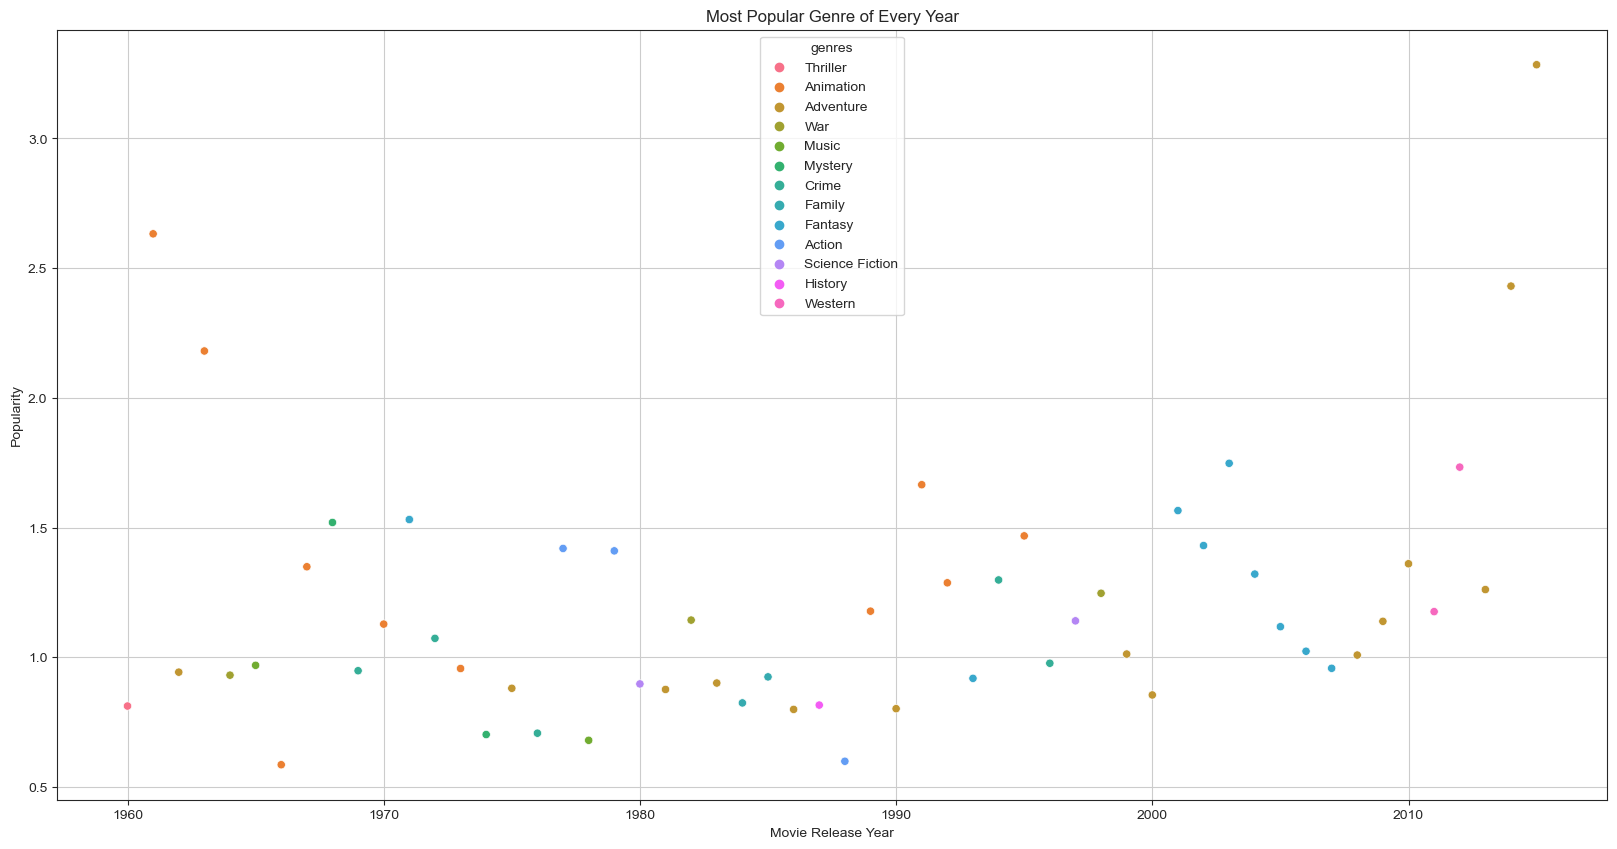

In [77]:
# set chart dimension
plt.figure(figsize=(20,10))

# set title
plt.title('Most Popular Genre of Every Year')
plt.xlabel('Movie Release Year')
plt.ylabel('Popularity')

#draw the scatter plot 
sns.scatterplot(x="release_year", y="popularity", hue="genres", data=yearly_popular_genre)
plt.grid(True)


#Move the legend outside the chart
#plt.legend(bbox_to_anchor=(1.05, 1));

    From our scatter graph, it is observed that there is no trend in the most popular movie genre each year.The conclusions made below were obtained by counting the frequency of each genre since the scatter plot tells us the most popular genre each year. 
    
    Between 1960 and 1970, it was Animation. Between 1970 and 1980, it was a mix between Mystery and Action. Between 1980 and  2000, it was Adeventure. From 2000 to 2010, it was Action. And between 2010 and 2015, there was an oscillation between Adventure and history.
    
    It is also observed that between 2000 till approximately 2007, Action was the most popular movie genre and for the rest of the decade, it was Adventure. 

In [78]:
genre_counts = df['genres'].value_counts()

# Display the result
print(genre_counts)

genres
Comedy                                      712
Drama                                       712
Documentary                                 312
Drama|Romance                               289
Comedy|Drama                                280
                                           ... 
Adventure|Animation|Romance                   1
Family|Animation|Drama                        1
Action|Adventure|Animation|Comedy|Family      1
Action|Adventure|Animation|Fantasy            1
Mystery|Science Fiction|Thriller|Drama        1
Name: count, Length: 2039, dtype: int64


In [79]:
# Get the count of occurrences for each genre
genre_counts = yearly_popular_genre['genres'].value_counts()

# Create a DataFrame with the counts
final_years_df = pd.DataFrame({'genre': genre_counts.index, 'No. of years': genre_counts.values})

# Sort the DataFrame by 'No. of years' in descending order
final_years_df = final_years_df.sort_values(by='No. of years', ascending=False)

<Figure size 1600x800 with 0 Axes>

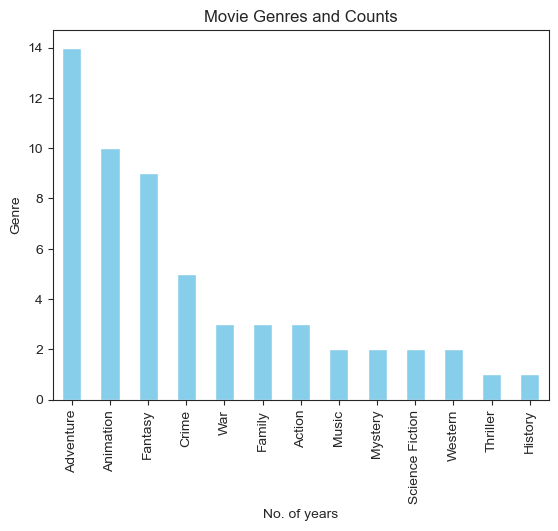

In [80]:
# set chart dimension
plt.figure(figsize=(16,8))

#plot a bar graph of the number of years each genre is the most popular
final_years_df.plot(kind='bar', x='genre', y='No. of years', color='skyblue', legend=False)

# Customize the plot
plt.title('Movie Genres and Counts')
plt.xlabel('No. of years')
plt.ylabel('Genre')

plt.show()


    From this bar chart, it is observed that the overall popular movie genre from 1960 to 2015 was Adventure and the least popular was History. 

### Research Question 3 (Which director produces the most movies?)

In [81]:
df['director'].value_counts().head(10)


director
Woody Allen          45
Clint Eastwood       34
Martin Scorsese      29
Steven Spielberg     29
Ridley Scott         23
Steven Soderbergh    22
Ron Howard           22
Joel Schumacher      21
Brian De Palma       20
Tim Burton           19
Name: count, dtype: int64

    Woody Allen has directed the most movies. He has directed 45 out of 10000+ movies.

### Research Question 4 (- What factors influence high movie revenues?)

    we will do this by taking our top 15 most profitable movies and see what makes the profitable.


    a movie is considered a “financial success” or profitable if its gross revenue is twice its reported budget. This means when ROI > 1. 
    Where ROI is (box office earnings / production budget).

In [82]:
movie_profit = df.groupby(['original_title', 'popularity','genres', 'release_year', 'revenue','budget'])['net_profit'].sum()
movie_profit = movie_profit.reset_index().sort_values('net_profit', ascending=False)

# calculate return in investment - ROI
movie_profit['ROI'] = (movie_profit['net_profit']/movie_profit['budget'])
movie_profit.head(15)

,original_title,popularity,genres,release_year,revenue,budget,net_profit,ROI
835,Avatar,9.432768,Action|Adventure|Fantasy|Science Fiction,2009,2781505847,237000000,2544505847,10.736312
7555,Star Wars: The Force Awakens,11.173104,Action|Adventure|Science Fiction|Fantasy,2015,2068178225,200000000,1868178225,9.340891
9975,Titanic,4.355219,Drama|Romance|Thriller,1997,1845034188,200000000,1645034188,8.225171
4543,Jurassic World,32.985763,Action|Adventure|Science Fiction|Thriller,2015,1513528810,150000000,1363528810,9.090192
3293,Furious 7,9.335014,Action|Crime|Thriller,2015,1506249360,190000000,1316249360,6.927628
8040,The Avengers,7.637767,Science Fiction|Action|Adventure,2012,1519557910,220000000,1299557910,5.907081
3692,Harry Potter and the Deathly Hallows: Part 2,5.711315,Adventure|Family|Fantasy,2011,1327817822,125000000,1202817822,9.622543
837,Avengers: Age of Ultron,5.944927,Action|Adventure|Science Fiction,2015,1405035767,280000000,1125035767,4.017985
3274,Frozen,6.112766,Animation|Adventure|Family,2013,1274219009,150000000,1124219009,7.494793
9174,The Net,1.136610,Crime|Drama|Mystery|Thriller|Action,1995,1106279658,22000000,1084279658,49.285439


     From our analysis, we observed a correlation between movie genres generating higher revenues and factors such as increased popularity, elevated budget, and augmented net profit. Similar patterns emerged when scrutinizing individual movies with substantial revenues. 

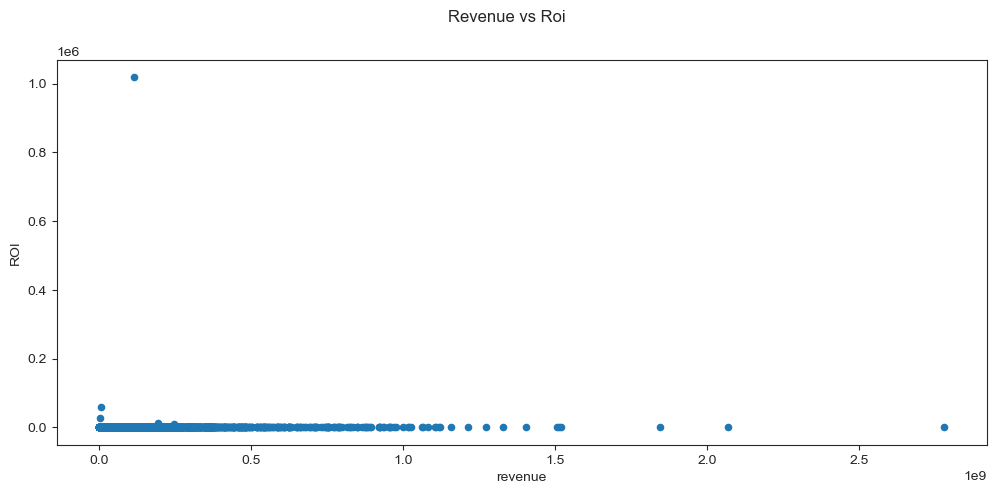

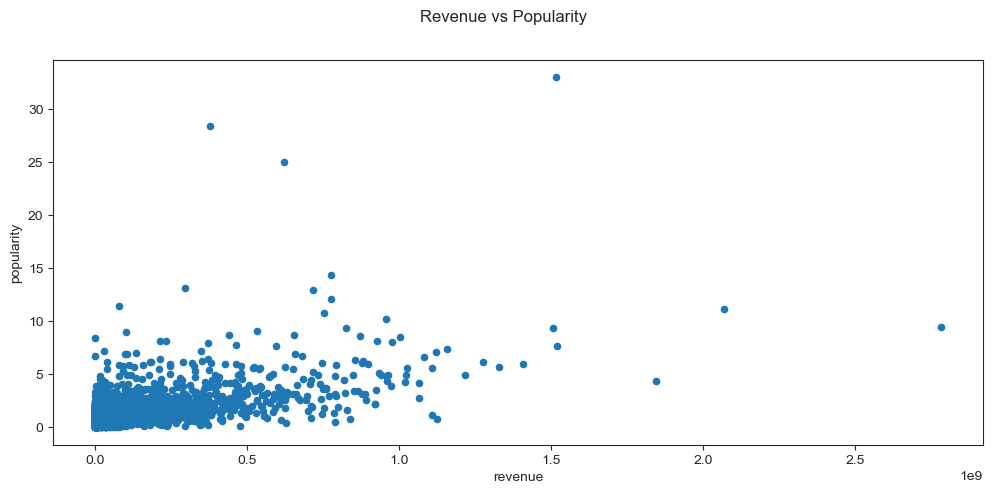

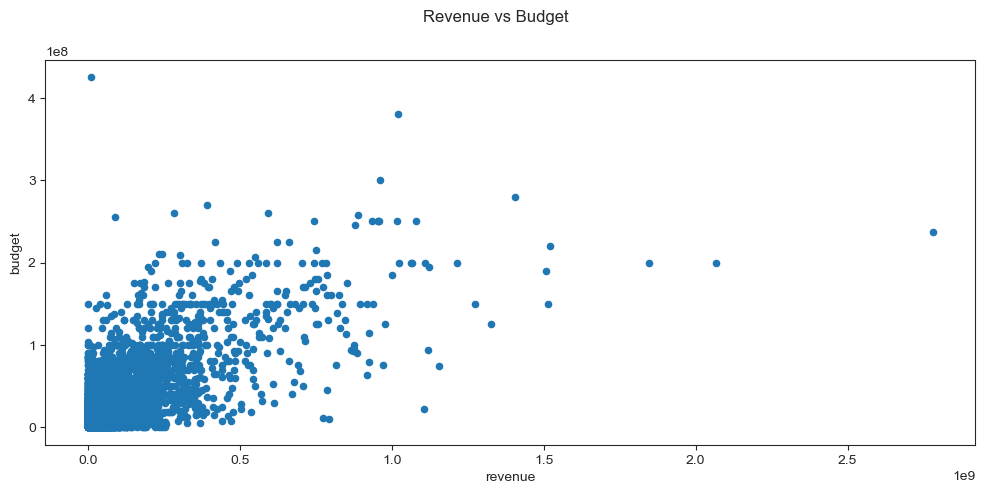

In [83]:
df2 = pd.DataFrame(movie_profit)

#create a function to make grpah plotting easier and more efficient 
def scatter_chart(val):
    df2.plot.scatter(x='revenue', y=val, title=f'Revenue vs {val.title()}', figsize=(12, 5), subplots=True)
    plt.show()

# Plotting each pair of columns separately
scatter_chart('ROI')
scatter_chart('popularity')
scatter_chart('budget')


    When observing the 3 scatter graphs, it is observed that there is little to no corellation between movie Revenue and the ROI, Popularity and budget. So we cannot use this as a metric to predict how much revenue a movie  is going to make.
    
    Therefore external factors such as demographic, trends, production, marketing etc. have an influence on the revenue. 

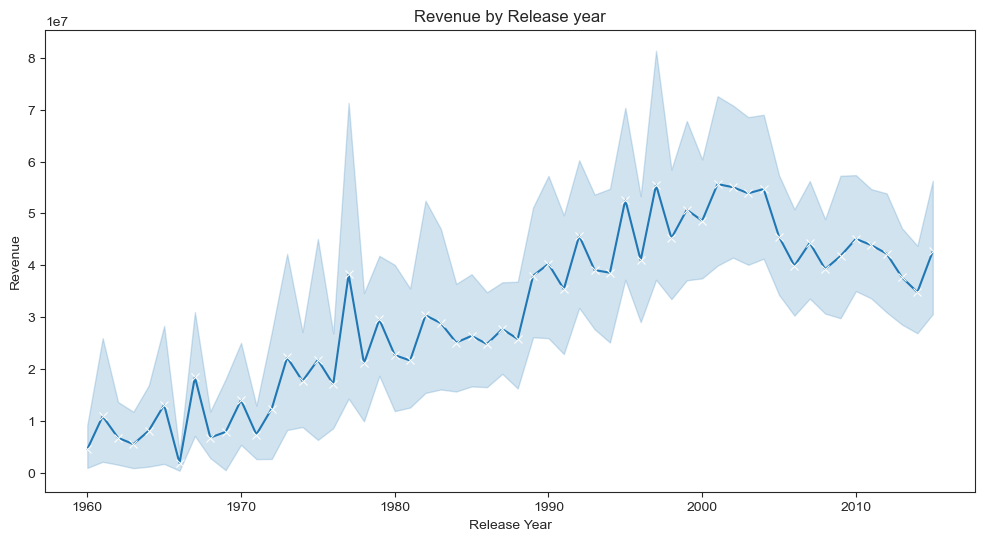

In [84]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='release_year', y='revenue', data=df2, marker='x')
plt.title('Revenue by Release year')
plt.xlabel('Release Year')
plt.ylabel('Revenue')
plt.show()



    From our analysis, it is observed that movie popularity and budget had an impact on the revenue, this trend is alsp observed when we observe the progression of time - as time progresses, revenenue tends to increase untill 2020, when it begins to decrease. 
    
    When comparing revenue with the ROI and profitability, we do not really see a change which may suggest a complicated relationship between, popularity, time and budget on the return on investment of a movie.  

In [85]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] Writing 1276572 bytes to Investigate_a_Dataset.html
